# Lesson 14a: Cluster Analysis

Cluster analysis is unsupervised learning. We have inputs that are modelled, we have outputs, but we do not have predictive power so that to describe correct values in the result.

We will use K-Means method to find clusters; K - refers to the number of clusters that we need, and, in the same time, it is the number of iterations which our model has to perform to find centroids (centers of clusters) correctly.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

## Load the data

In [7]:
data = pd.read_csv("3.01.Country_clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

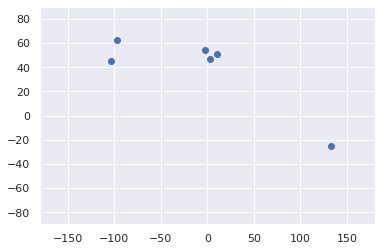

In [9]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [13]:
x = data.iloc[:,1:3]

# The function DataFrame.iloc[row idexes, column indexes] slices the table and chooses specific rows and cols.
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [20]:
kmeans = KMeans(3)   # Here I specify how many clusters I want.
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
identified_clusters = kmeans.fit_predict(x)   # This function returns the cluster predictions in an array.
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [22]:
# So we have got 5 countries in the cluster 0, and 1 country in the cluster 1.

In [23]:
data_with_clusters = data.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


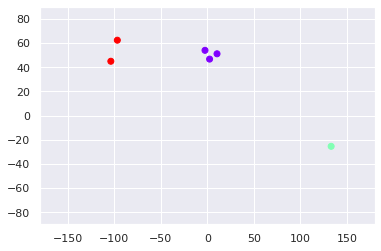

In [24]:
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], 
            c = data_with_clusters["Clusters"], cmap = "rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()